# Introducción a Earth Engine 

Este cuaderno es una breve introducción a las potencialidades de **API Python Earth Engine**.
Este servicio permite acceder a mapas planetarios e imágenes aéreas que son bastante extensas y considerablemente más especializadas que aquellas a las que se puede acceder de forma inmediata a través de Google Earth. Estos incluyen conjuntos de datos globales y sub-globales relacionados con la cobertura del suelo, la elevación topográfica, y condiciones meteorológicas que a menudo varían en el tiempo y en el espacio.

<center>
![](https://raw.githubusercontent.com/csaybar/programacionUNMSM/master/class02%3AGEE/img/ee.png)

## Qué es Google Earth Engine?

Earth Engine consiste en un catálogo de datos listos para análisis de múltiples petabytes que se ubica junto con un servicio de computación intrínsecamente paralelo de alto rendimiento. Se accede y se controla mediante una interfaz de programación de aplicaciones (API) accesible a través de Internet y un entorno de desarrollo interactivo (IDE) asociado que permite la creación rápida de prototipos y la visualización de resultados.


El catálogo de datos alberga un gran depósito de conjuntos de datos geoespaciales disponibles públicamente, que incluyen observaciones de una variedad de sistemas de imágenes aéreas y satelitales en longitudes de onda ópticas y no ópticas, variables ambientales, predicciones meteorológicas y climáticas e interconexiones, cobertura del suelo, topografía y socioeconomía. Conjuntos de datos económicos. Todos estos datos están preprocesados a una forma lista para usar pero que preserva la información que permite un acceso eficiente y elimina muchas barreras asociadas con la administración de datos.

<center>
![](https://raw.githubusercontent.com/csaybar/programacionUNMSM/master/class02%3AGEE/img/architecture.png)
  
**Diagrama simplificado de la arquitectura del sistema.**

In [0]:
# Revisar el sistema operativo
!cat /etc/*release

In [0]:
# Cuántos CPU tiene?
!lscpu

In [0]:
# Cuánta RAM tiene?
!grep MemTotal /proc/meminfo

## 1. Servicios autorizados

In [0]:
#@title Google Earth Engine (Oauth2 Authorization)

# Compruebe si el servidor está autenticado. Si no, muestre instrucciones que expliquen cómo completar el proceso.

!pip install earthengine-api
import ee  

!earthengine authenticate
ee.Initialize()

In [0]:
#@title Google Drive (Oauth Authorization)
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from matplotlib import pyplot

## 2. Colab & Google drive example

In [0]:
#1._ Create a folder in google drive from colab
import os, errno
newfolder = 'drive/My Drive/clase03/'
os.makedirs(newfolder)


In [0]:
#2._ Change current directory /content to newfolder
pwd      # 1.current directory

'/content'

In [0]:
cd /content/drive/My\ Drive/clase03/

/content/drive/My Drive/clase03


In [0]:
pwd

'/content/drive/My Drive/clase03'

## 3. Google Earth Objects

Think of **_ee.Thing_** as a container for a thing that exists on the server. In this example, the string is defined first, then put into the container. You can also define the container and its contents all at once. For example:

Although the first argument to print() is just a string on the client, the second argument is actually sent to the server to be evaluated, then sent back.

### 3.1 Strings
For example, define a string, then put it into the ee.String() container to be sent to Earth Engine:

In [0]:
# Define a string, then put it into an EE container.
aString = 'To the cloud!'
eeString = ee.String(aString)
print('Where to?', eeString)

Where to? ee.String("To the cloud!")


### 3.2 Numbers
Use **ee.Number()** to create number objects on the server. 



In [0]:
import math
serverNumber = ee.Number(math.e)
print('e=', serverNumber);

e= ee.Number(2.718281828459045)


In [0]:
log_e = serverNumber.log()
log_e.getInfo()

1.0

### 3.3 List

To make a Python list into an ee.List object on the server, you can put a Python literal into a container as with numbers and strings. Earth Engine also provides server-side convenience methods for making sequences of numbers. For example:

In [0]:
eeList = ee.List([1, 2, 3, 4, 5])
# Make a sequence the easy way!
sequence = ee.List.sequence(1, 5)
print('Sequence:', sequence)
sequence.getInfo()

3.0

### 3.4 Dictionaries

You can construct an Earth Engine Dictionary from a Python object, as with strings, numbers and lists. At construction time, you can use JavaScript functionality to initialize the Earth Engine object. In this case an ee.Dictionary is constructed directly from a Python literal object:



In [0]:
import math 

dictionary = ee.Dictionary({
  'e': math.e,
  'pi': math.pi,
  'phi': (1 + math.sqrt(5)) / 2
})

print('Euler:', dictionary.get('e'))
print('Pi:', dictionary.get('pi'))
print('Golden ratio:', dictionary.get('phi'))

dictionary.keys().getInfo()

['e', 'phi', 'pi']

### 3.5 Dates

Date objects are the way Earth Engine represents time. As in the previous examples, it is important to distinguish between a Python Date object and an Earth Engine ee.Date object. Construct an ee.Date from a string, from a Python Date, or using static methods provided by the ee.Date class. This example illustrates the construction of dates from strings or a Python date representing milliseconds since midnight on January 1, 1970:

In [0]:
# Create a Date object using a string
date = ee.Date('2015-12-31')
print('Date:', date)
print(date.getInfo())

# Create a Date object using the module datetime
import datetime
now = datetime.datetime.now()
print('Milliseconds since January 1, 1970', now)
eeNow = ee.Date(now)
print('Now:', eeNow)
eeNow.getInfo()

## 3.6 Digression: passing parameters by name

Arguments to Earth Engine methods can be passed in order, for example to create an ee.Date from year, month and day, you can pass parameters of the fromYMD() static method in the order year, month, day:

In [0]:
# First method
aDate = ee.Date.fromYMD(2017, 1, 13)
print('aDate:', aDate)
aDate.getInfo()

## 4. Hello world 
---
**ee.Image('assetID'):** In GEE  raster data are represented as **Image objects**. Images are composed of one or more bands and each band has its own name, data type, scale, mask and projection. Each image has metadata stored as a set of properties. 

**ee.Image()** accepts a variety of arguments:
- A string: an EarthEngine asset id,
- A string and a number - an EarthEngine asset id and version,
- A number or EEArray: creates a constant image,
- A list: creates an image out of each list element and combines them into a single image,
- An ee.Image: returns the argument,
- Nothing: results in an empty transparent image.

---

**ee.Terrain.hillshade**
Computes a simple hillshade from a DEM.

**ee.Terrain.slope**
Calculates slope in degrees from a terrain DEM. The local gradient is computed using the 4-connected neighbors of each pixel, so missing values will occur around the edges of an image.

---
**ee.Image.addBands()**
Returns an image containing all bands copied from the first input and selected bands from the second input, optionally overwriting bands in the first image with the same name. The new image has the metadata and footprint from the first input image.

In [0]:
from IPython.display import Image
# Display a thumbnail of a sample image asset.
Image(url=ee.Image("USGS/SRTMGL1_003").getThumbUrl({'min': 0, 'max': 3000}))

In [0]:
#Loading a image
terrain = ee.Image("CGIAR/SRTM90_V4").float()
terrain.getInfo()

#### slope
*Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918*

Horn (1981) Calcula la pendiente de una celda focal mediante el uso de una estimación de diferencia central de una superficie adaptada a la célula focal y sus vecinos. La pendiente elegida es el máximo de esta superficie y puede devolverse en varios formatos.

#### aspect
*Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918*

Horn (1981) calcula el aspecto como la dirección de la pendiente máxima de la celda focal. El valor devuelto es en grados.

In [0]:
# Estimating the slope
slope = ee.Terrain.slope(terrain).float()

# Estimating the hillshade
aspect = ee.Terrain.aspect(terrain).float()

#Adding the slope and hillshade to the dem
newterrain = terrain.addBands(slope).addBands(aspect)
print(newterrain)

## 4.  Upload a Shapefile

In [0]:
#4.1 Install libraries
!pip install geopandas # manipulate geometries in python
!pip install descartes # vizualization library

In [0]:
#4.2 Install libraries
import geopandas as gpd # Manipulate geometries in python
import urllib # Package that collects several modules for working with URLs.
import zipfile # Unzip a *.zip file
from matplotlib import pyplot as plt # Data vzualization with python!

In [0]:
#4.3 download "prov.zip"
provincias = 'https://github.com/csaybar/programacionUNMSM/raw/master/class02:GEE/data/data.zip'
urllib.request.urlretrieve(provincias, 'prov.zip')

#4.4 unzip
zpfile = 'prov.zip'
with zipfile.ZipFile(zpfile, 'r') as zip_file:
  zip_file.extractall('.')

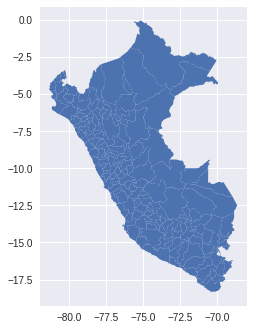

In [0]:
provincias = gpd.read_file('Provincia.shp')
provincias.plot()
plt.show()

## 5. Geopandas to ee.Geometry

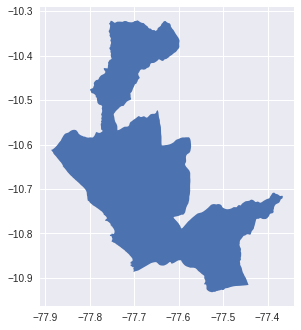

In [0]:
# 5.1 Select a province of Peru!
quispicanchi = provincias[provincias.NOMBRE == 'BARRANCA']
quispicanchi_geojson = eval(quispicanchi.to_json())
quispicanchi.plot()
plt.show()

- **ee.Geometry('type menber'):** GEE handles vector data with the Geometry type. The [GeoJSON](http://geojson.org/geojson-spec.html) spec describes in detail the type of geometries supported by Earth Engine.

![](https://r-spatial.github.io/sf/articles/sf1_files/figure-html/unnamed-chunk-20-1.png)

---
- **ee.Feature('type menber'):** A Feature in GEE is defined as a **GeoJSON** Feature. Specifically, a Feature is an object with a **geometry property** storing a Geometry object (or null) and a **properties property** storing a dictionary of other properties.


In [0]:
# 5.2 Creating a ee.Geometry
coord_poly = quispicanchi_geojson['features'][0]['geometry']['coordinates']
properties_poly = quispicanchi_geojson['features'][0]['properties']

# 5.3 Creating a ee.Feature (Remenber that ee.Feature(ee.Geometry,properties))
quispicanchi_geom = ee.Geometry.Polygon(coord_poly)
quispicanchi_feature = ee.Feature(quispicanchi_geom,properties_poly)
print(quispicanchi_feature)

## 6. Clipping image and metada

In [0]:
newterrain_crop = newterrain.clip(quispicanchi_feature)

print(newterrain_crop.bandNames().getInfo()) #band names
print(newterrain_crop.projection().getInfo()) #CRS and transform
print(newterrain_crop.projection().nominalScale().getInfo()) #pixel resolution
print(newterrain_crop.propertyNames().getInfo()) #List of metadata properties

## 7. Dowloading a ee.Image()

In [0]:
# 7.1 First method (obsolete)
pixel_size = newterrain_crop.projection().nominalScale().getInfo()
terrain = newterrain_crop.getDownloadURL({
            'scale':pixel_size,
            'crs':'EPSG:4326'
    })
print(terrain)

https://earthengine.googleapis.com/api/download?docid=0b85fd6db8620a2932afb972304c7156&token=fd7b23ebebcbd03f189ce69c92c64a6a


In [0]:
#7.2 Second method (Save in your google drive account)
task_config = {
    'scale': pixel_size,
    'folder': 'myfirstfolder'
    #'region': geometry
    }

task = ee.batch.Export.image(newterrain_crop, 'myterrain', task_config)
task.start()

In [0]:
task.status()

## NDVI using Landsat8

In [0]:
init_date = ee.Date('2015-12-31')
last_date = ee.Date('2018-12-31')
l8_s = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")\
         .filterDate(init_date,last_date)\
         .max()\
         .normalizedDifference(['B5', 'B4'])\
         .clip(quispicanchi_feature)

task_config = {
    'scale': 30,
    'folder': 'myfirstfolder'
}
task = ee.batch.Export.image(l8_s, 'ndvi', task_config)
task.start()

In [0]:
task.status()

{'creation_timestamp_ms': 1548651839948,
 'description': 'ndvi',
 'id': '5QMB723E4GCAJ6GQBVXFK325',
 'output_url': ['https://drive.google.com/#folders/1-6AjOTMOl4IHT8WX1jrkckLvyTCs3YP2'],
 'start_timestamp_ms': 1548651847084,
 'state': 'COMPLETED',
 'task_type': 'EXPORT_IMAGE',
 'update_timestamp_ms': 1548652012810}